* Course: DSC_550
*  Assignment: Milestone 1
*  Nels Findley

# Car Sales Report

The dataset for this analysis can be downloaded from https://www.kaggle.com/datasets/missionjee/car-sales-report.

This analysis delves into the provided car sales dataset with the goal of future inventory strategies. The core problem I aim to address is inefficient inventory management resulting from a lack of predictive insight into customer preferences and market trends. By identifying key sales patterns and preferences, we can optimize inventory stock, reduce carrying costs, and ensure popular models are readily available to the customer.

The target for the model is to accurately forecast demands for specific car models.  By achieving this, we can ensure that dealerships have the right cars at the right time and location, reducing the risks of overstocking unpopular models or running out of high-demand vehicles. 

The date column is essential for seasonal trends to identify how sales fluctuate throughout the year. The data can be examined further to see that convertibles have increased sales in the spring and summer, while SUVs might be more popular in the colder months. This will help with timing inventory.

The body style sales count can determine the popularity of sedans, SUVs, hatchbacks, etc., over time and across multiple regions. The transmission counts show the buyers' preference for automatic versus manual transmission. The location sales count will help understand geographical variation in demand if specific car models or body styles are more popular in particular regions, climates, or lifestyles. 

The model will provide actionable insights on which type of cars, with specific attributes, are most likely to sell in a given season and region. This predictive capability will allow dealerships to make data-driven decisions on purchasing future inventory, improving customer satisfaction. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("missionjee/car-sales-report")

# Read csv file
df = pd.read_csv(path + "\Car Sales.xlsx - car_data.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Text(0, 0.5, 'Number of Sales')

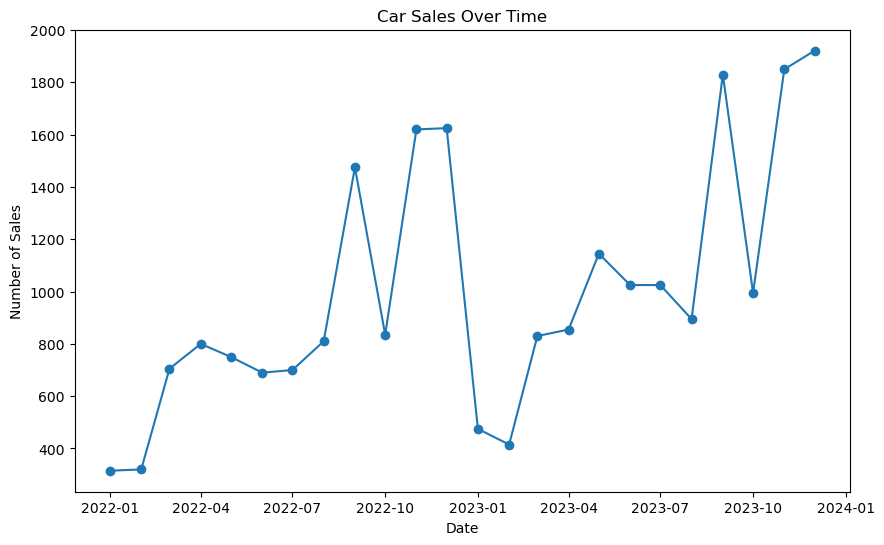

In [2]:
# Convert column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth and count sales
sales_over_time = df.groupby('YearMonth').size().reset_index(name='SalesCount')

# Convert YearMonth back to datetime for plotting
sales_over_time['YearMonth'] = sales_over_time['YearMonth'].dt.to_timestamp()

# Plot the sales over time
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['YearMonth'], sales_over_time['SalesCount'], marker='o')
plt.title('Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

Car Sales Over Time graph shows the car sales increases overtime throught the year and has sharp decrease at the beginning of the year in January.

Text(0, 0.5, 'Number of Cars')

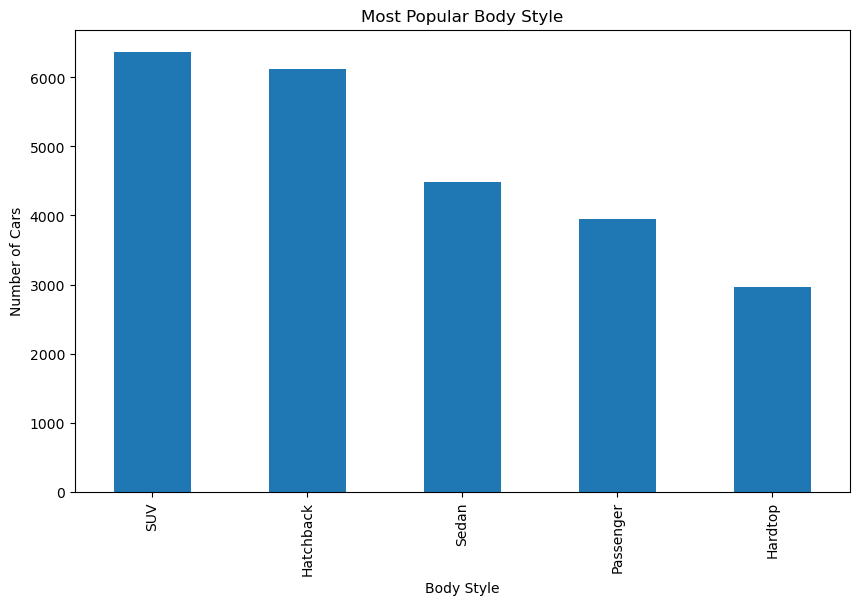

In [3]:
# Get the body style count
body_style_counts = df['Body Style'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar')
plt.title('Most Popular Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')

The "Most Popular Body Style" graph shows that SUV is the most popular body style type and the lease popular are hardtops.

Text(0, 0.5, 'Number of Sales')

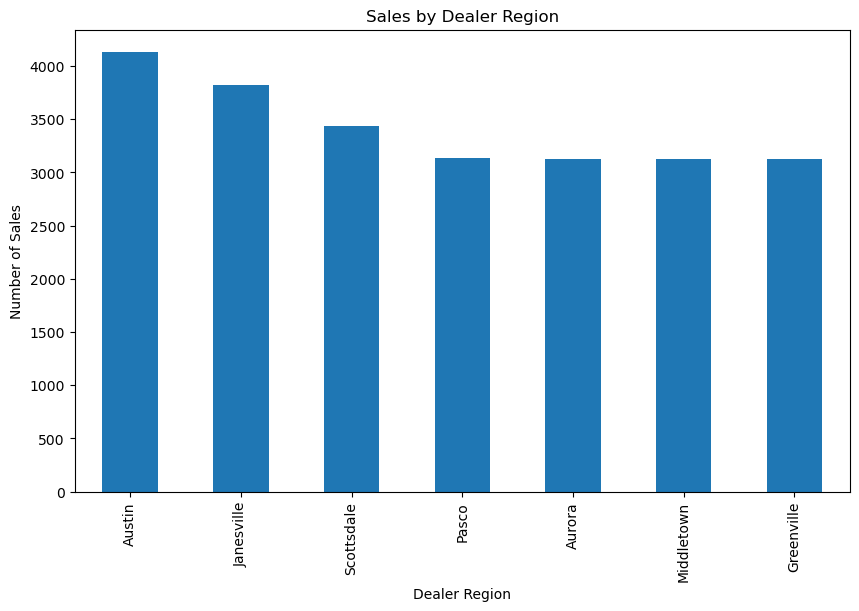

In [4]:

# Get Dealer region count
dealer_region_counts = df['Dealer_Region'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
dealer_region_counts.plot(kind='bar')
plt.title('Sales by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Sales')

The "Sales by Dealer Region" graph shows the most popular sales locations.

Text(0, 0.5, 'Count')

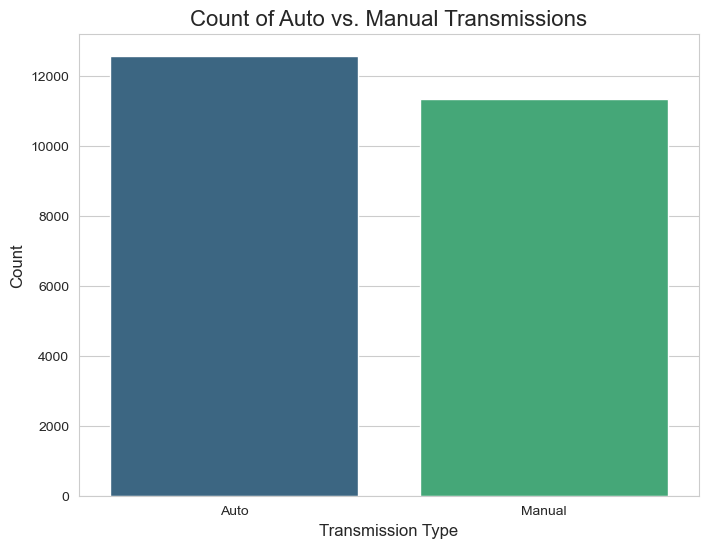

In [5]:
# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df, hue='Transmission', palette='viridis', legend=False)

# Add titles and labels
plt.title('Count of Auto vs. Manual Transmissions', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

The graph "Count of Auto vs Manual Transmissions" shows that auto transmission's are only slightly more popular than manual transmission. 

# Overview

My analysis shows a clear pattern in sales: November and December are peak months, with a sharp drop in January.

The data also highlights that SUVs are our top-selling body style and should always be well-stocked. Hardtops, on the other hand, are the least popular, so we should reduce their inventory. Additionally, automatic transmissions are only slightly more popular than manual transmissions.

Among all locations, Austin consistently has the highest sales volume and should maintain the largest car inventory. While other locations perform similarly, Austin stands out.

# Milestone 2

In [6]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,YearMonth
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022-01
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022-01
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022-01
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022-01
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,2023-12
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,2023-12
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,2023-12
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,2023-12


In [7]:
df_clean = df.drop(columns='Phone')
df_clean = df_clean.drop(columns='Customer Name')
df_clean = df_clean.drop(columns='Gender')
df_clean = df_clean.drop(columns='Car_id')
df_clean = df_clean.drop(columns='Dealer_No ')

I dropped the following features phone, customer name, and gender as they are personally identifiable information and lack irrelevant to broader market trend analysis. The Car_id and Dealer_no are also droped as both are unique identifiers that inherit no special meaning. These features have the potential to introduce noise or complexity into the model without significant gain. 

In [8]:
df_clean['Quarter'] = df_clean['Date'].dt.quarter
df_clean

# For transformation I've added Quarter and YearMonth feature to the data set. This will be useful on finding analys for quarterly and montly trends. The YearMonth feature was added during MileStone 1

,Date,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,YearMonth,Quarter
0,2022-01-02,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,2022-01,1
1,2022-01-02,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,2022-01,1
2,2022-01-02,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,2022-01,1
3,2022-01-02,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,2022-01,1
4,2022-01-02,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,2022-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco,2023-12,4
23902,2023-12-31,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown,2023-12,4
23903,2023-12-31,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,2023-12,4
23904,2023-12-31,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin,2023-12,4


In [9]:
# Add One-Hot Encoding on the 'Color' column. This is useful for machine learning models
# df_clean = pd.get_dummies(df_clean, columns=['Color'], prefix='Color', drop_first=False)

# Fix for milestone 3
columns_to_encode = ['Color', 'Body Style', 'Model']


# Perform one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=columns_to_encode, drop_first=False)

# Display the encoded DataFrame
df_encoded

,Date,Annual Income,Dealer_Name,Company,Engine,Transmission,Price ($),Dealer_Region,YearMonth,Quarter,...,Model_Town & Country,Model_Town car,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra
0,2022-01-02,13500,Buddy Storbeck's Diesel Service Inc,Ford,DoubleÂ Overhead Camshaft,Auto,26000,Middletown,2022-01,1,...,False,False,False,False,False,False,False,False,False,False
1,2022-01-02,1480000,C & M Motors Inc,Dodge,DoubleÂ Overhead Camshaft,Auto,19000,Aurora,2022-01,1,...,False,False,False,False,False,False,False,False,False,False
2,2022-01-02,1035000,Capitol KIA,Cadillac,Overhead Camshaft,Manual,31500,Greenville,2022-01,1,...,False,False,False,False,False,False,False,False,False,False
3,2022-01-02,13500,Chrysler of Tri-Cities,Toyota,Overhead Camshaft,Manual,14000,Pasco,2022-01,1,...,False,False,False,False,False,False,False,False,False,False
4,2022-01-02,1465000,Chrysler Plymouth,Acura,DoubleÂ Overhead Camshaft,Auto,24500,Janesville,2022-01,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,13500,C & M Motors Inc,Plymouth,Overhead Camshaft,Manual,12000,Pasco,2023-12,4,...,False,False,False,False,False,False,True,False,False,False
23902,2023-12-31,900000,Ryder Truck Rental and Leasing,Chevrolet,DoubleÂ Overhead Camshaft,Auto,16000,Middletown,2023-12,4,...,False,False,False,False,False,False,False,False,False,False
23903,2023-12-31,705000,Chrysler of Tri-Cities,BMW,Overhead Camshaft,Manual,21000,Scottsdale,2023-12,4,...,False,False,False,False,False,False,False,False,False,False
23904,2023-12-31,13500,Chrysler Plymouth,Chevrolet,DoubleÂ Overhead Camshaft,Auto,31000,Austin,2023-12,4,...,False,False,False,False,False,False,False,False,False,False


In [10]:
print("Rows with any null values")
print(df_encoded[df_encoded.isnull().any(axis=1)])
# Confrimed there are no missing data in any rows/columns

Rows with any null values
Empty DataFrame
Columns: [Date, Annual Income, Dealer_Name, Company, Engine, Transmission, Price ($), Dealer_Region, YearMonth, Quarter, Color_Black, Color_Pale White, Color_Red, Body Style_Hardtop, Body Style_Hatchback, Body Style_Passenger, Body Style_SUV, Body Style_Sedan, Model_3-Sep, Model_3000GT, Model_300M, Model_323i, Model_328i, Model_4Runner, Model_5-Sep, Model_528i, Model_A4, Model_A6, Model_A8, Model_Accent, Model_Accord, Model_Alero, Model_Altima, Model_Aurora, Model_Avalon, Model_Avenger, Model_Beetle, Model_Bonneville, Model_Boxter, Model_Bravada, Model_Breeze, Model_C-Class, Model_C70, Model_CL500, Model_CLK Coupe, Model_CR-V, Model_Cabrio, Model_Camaro, Model_Camry, Model_Caravan, Model_Carrera Cabrio, Model_Carrera Coupe, Model_Catera, Model_Cavalier, Model_Celica, Model_Century, Model_Cherokee, Model_Cirrus, Model_Civic, Model_Concorde, Model_Continental, Model_Contour, Model_Corolla, Model_Corvette, Model_Cougar, Model_Crown Victoria, Model

In [11]:
df_encoded.info()
# This confirmed that the features are the correct data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Columns: 172 entries, Date to Model_Xterra
dtypes: bool(162), datetime64[ns](1), int32(1), int64(2), object(5), period[M](1)
memory usage: 5.4+ MB


# Milestone 3

In [12]:
# Setup libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Find a poplar model to do analysis on
boolean_columns = df_encoded.select_dtypes(include='bool').columns
true_counts_in_boolean_cols = df_encoded.loc[:, boolean_columns].sum()

print("\nCounts of True values in boolean columns (sorted - most at top):")
print(sorted_true_counts.head(10))


Counts of True values in boolean columns (sorted - most at top):
Color_Pale White        11256
Color_Black              7857
Body Style_SUV           6374
Body Style_Hatchback     6128
Color_Red                4793
Body Style_Sedan         4488
Body Style_Passenger     3945
Body Style_Hardtop       2971
Model_Diamante            418
Model_Silhouette          411
dtype: int64


21:23:53 - cmdstanpy - INFO - Chain [1] start processing
21:23:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Nels\School\dsc530\envs\book_env\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Nels\School\dsc530\envs\book_env\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',



 Evaluation for Model_Diamante
Mean Absolute Error (MAE): 1.07
Root Mean Squared Error (RMSE): 1.21

Predicted Sales for Model_Diamante for the next 30 days:
| ds                  | yhat     | yhat_lower   | yhat_upper   |
|:--------------------|:---------|:-------------|:-------------|
| 2024-01-01 00:00:00 | 0.791657 | -0.436221    | 1.99451      |
| 2024-01-02 00:00:00 | 1.01108  | -0.274071    | 2.25473      |
| 2024-01-03 00:00:00 | 0.558225 | -0.716373    | 1.69259      |
| 2024-01-04 00:00:00 | 0.419754 | -0.85        | 1.62172      |
| 2024-01-05 00:00:00 | 0.718005 | -0.473051    | 1.95633      |
| 2024-01-06 00:00:00 | 0.633302 | -0.593045    | 1.78818      |
| 2024-01-07 00:00:00 | 0.714489 | -0.491331    | 1.94744      |
| 2024-01-08 00:00:00 | 0.533074 | -0.648839    | 1.73307      |
| 2024-01-09 00:00:00 | 0.766167 | -0.452305    | 1.94595      |
| 2024-01-10 00:00:00 | 0.328769 | -0.924793    | 1.53184      |
| 2024-01-11 00:00:00 | 0.207328 | -1.12795     | 1.41816    

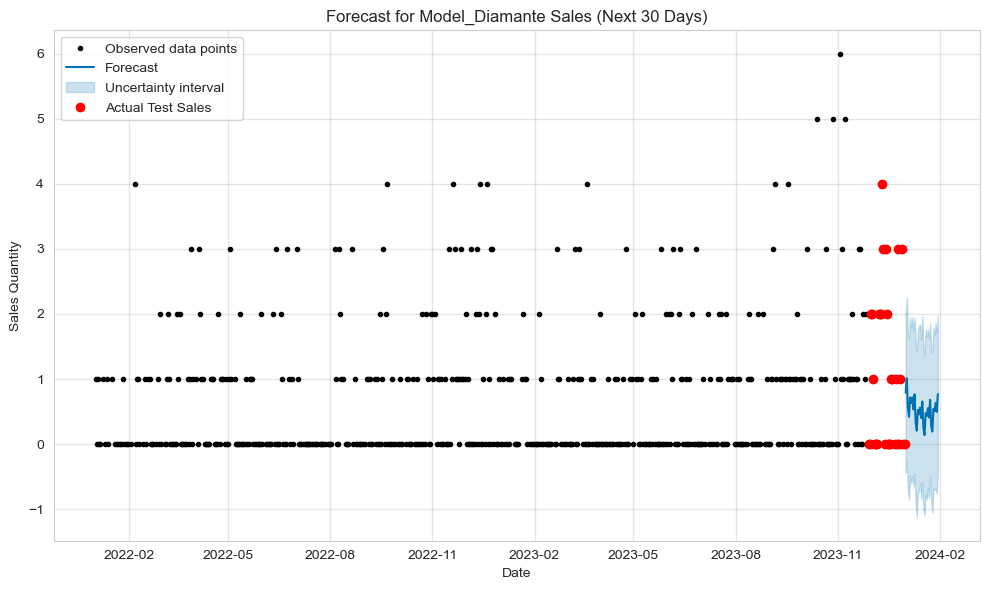

In [31]:
# I chose to use Model_Diamante as it's the most popular model.
# My goal is to predict sales for the next month ie 30 days. 

# Identify model columns
model_columns = [col for col in df_encoded.columns if col.startswith('Model_')]

# Melt the DataFrame to get a row for each model sold per date
df_melted_models = df_encoded.melt(id_vars=['Date'], value_vars=model_columns, var_name='Model_Encoded', value_name='Is_Sold')
df_melted_models = df_melted_models[df_melted_models['Is_Sold'] == True]

# Group by Date and Model_Encoded to count daily sales for each model
daily_model_sales = df_melted_models.groupby(['Date', 'Model_Encoded']).size().reset_index(name='Sales_Quantity')

# Pivot the table to have dates as index and model columns as sales quantities
daily_model_sales_pivot = daily_model_sales.pivot_table(index='Date', columns='Model_Encoded', values='Sales_Quantity', fill_value=0)

# Forecasting for Model_Diamante.   The target model can easily be changed to other columns for testing. 
target_model = 'Model_Diamante'
df_target = daily_model_sales_pivot[[target_model]].reset_index()
df_target.columns = ['ds', 'y']

# Split data into training and testing sets
# Use the last 30 days for testing
test_size = 30
train_df = df_target.iloc[:-test_size]
test_df = df_target.iloc[-test_size:]

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False) # Daily seasonality for prophet model
model.fit(train_df)

# Create future DataFrame for prediction next month
last_historical_date = df_target['ds'].max()
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=30, freq='D')
future = pd.DataFrame({'ds': future_dates})

# Make predictions for the future
forecast = model.predict(future)

#  Run model evaluate on the test set
# Create future DataFrame for the test period to evaluate against actuals
future_test = model.make_future_dataframe(periods=test_size, include_history=False)
forecast_test = model.predict(future_test)

# Align predictions with actual test values
actual_values = test_df['y'].values
predicted_values = forecast_test['yhat'].values

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"\n Evaluation for {target_model}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Create a plot for the forecast
fig = model.plot(forecast)
plt.title(f'Forecast for {target_model} Sales (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')

# Add actual test data points to the plot for visual comparison
plt.plot(test_df['ds'], test_df['y'], 'ro', label='Actual Test Sales')
plt.legend()
plt.tight_layout()
plt.savefig('model_diamante_forecast.png')

# Display the predicted sales for the next month
print(f"\nPredicted Sales for {target_model} for the next 30 days:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(30).to_markdown(index=False, numalign="left", stralign="left"))

# Overview

This project focuses on forecasting daily sales for various car models. For this purpose, Prophet, an open-source forecasting library developed by Meta, was chosen. Prophet is particularly well-suited for time series forecasting as it can effectively handle trends, seasonality (daily, weekly, yearly), and the impact of holidays, even with missing data or irregular historical patterns.

For this specific evaluation, Model_Diamante was selected due to its highest historical sales volume among the available car models. Over the past two years, Model_Diamante recorded a total of 418 sales, which theoretically translates to an average of approximately one sale every two days. This relatively low and intermittent sales pattern presents a characteristic challenge for time series forecasting.

Forecasting Model Evaluation:
The Prophet model's performance was evaluated using the following metrics on the test period:

Mean Absolute Error (MAE): 1.07

This indicates that, on average, the model's daily sales predictions for Model_Diamante were off by approximately 1.07 cars during the test period.

Root Mean Squared Error (RMSE): 1.21

RMSE provides a similar measure of error magnitude but gives more weight to larger prediction errors. An RMSE of 1.21 suggests that the typical magnitude of prediction errors, considering the squared differences, was about 1.21 units.

Interpretation: For a car model like Model_Diamante, which experiences low and intermittent daily sales (often below one unit per day in prediction), an MAE around 1.07 suggests that the model is generally predicting close to the actual daily sales, often varying by about one unit. This is a common outcome for forecasting low-volume items, where predicting zero on many days is often the best strategy to minimize error. The close proximity of MAE and RMSE values indicates a consistent error distribution without significantly large, outlying errors.